In [43]:
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import math
import numpy as np
import matplotlib.pyplot as plt


loansData_clean = pd.read_csv('loansData_clean.csv')

b = lambda x: 1 if x >= 0.12 else 0
loansData_clean['IR_TF'] = loansData_clean['Interest.Rate'].map(b)
loansData_clean['Intercept'] = 1

ind_vars = ['amount_requested', 'fico_score', 'Intercept']

logit = sm.Logit(loansData_clean['IR_TF'], loansData_clean[ind_vars])

result = logit.fit()

coeff = result.params

print coeff


def logistic_function(x, y, z):
    p = (1/(1 + math.e**(x[2] + x[1]*y + x[0]*z)))
    print 'p = {}'.format(p)
    if p >= 0.7:
        print 'Approved'
    else:
        print 'Denied'

logistic_function(coeff, 720, 10000)

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8
amount_requested     0.000174
fico_score          -0.087423
Intercept           60.125045
dtype: float64
p = 0.746378588952
Approved


In [44]:
cols = ['IR_TF','Interest.Rate','amount_requested','fico_score']
loansData_clean[cols].head()

,IR_TF,Interest.Rate,amount_requested,fico_score
0,0,0.0890,20000,735
1,1,0.1212,19200,715
2,1,0.2198,35000,690
3,0,0.0999,10000,695
4,0,0.1171,12000,695


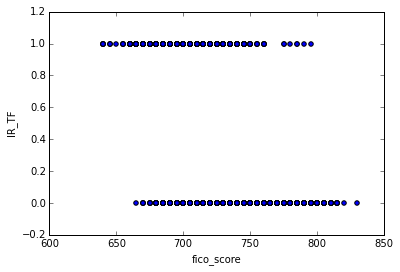

In [45]:
loansData_clean.plot(kind='scatter',x='fico_score', y='IR_TF')

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8


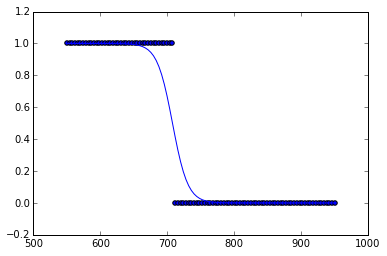

In [46]:
n_samples = 100
new_observation = pd.DataFrame({'amount_requested': [10000] * n_samples,
                                'fico_score': np.linspace(550, 950, n_samples)})

model = smf.logit('IR_TF ~ fico_score + amount_requested', loansData_clean).fit()
probabilities = model.predict(new_observation)
decisions = (probabilities > 0.5).astype(int)
plt.plot(new_observation.fico_score, probabilities)
plt.scatter(new_observation.fico_score, decisions)